# Implementing a 2-Layer Neural Network
In this exercise we will develop a 2-layer neural network with fully-connected layers to perform classification, and test it out on the CIFAR-10 dataset. In general, ReLU activation works the best. So ReLU instead of sigmoid will be used in the assignments afterwards.

In [4]:
# A bit of setup

import numpy as np
import matplotlib.pyplot as plt
from lib.classifiers.neural_net import TwoLayerNet
from __future__ import print_function

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# for auto-reloading external modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

np.random.seed(1)

def rel_error(x, y):
    """ returns relative error """
    return np.max(np.abs(x - y) / (np.maximum(1e-8, np.abs(x) + np.abs(y))))

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


We will use the class `TwoLayerNet` in the file `lib/classifiers/neural_net.py` to represent instances of our network. The network parameters are stored in the instance variable `self.params` where keys are string parameter names and values are numpy arrays. Below, we initialize toy data and a toy model that we will use to develop your implementation.

In [5]:
# Create a small net and some toy data to check your implementations.
# Note that we set the random seed for repeatable experiments.

input_size = 4
hidden_size = 10
num_classes = 3
num_inputs = 5

def init_toy_model():
    np.random.seed(0)
    return TwoLayerNet(input_size, hidden_size, num_classes, std=1e-1)

def init_toy_data():
    np.random.seed(1)
    X = 10 * np.random.randn(num_inputs, input_size)
    y = np.array([0, 1, 2, 2, 1])
    return X, y

net = init_toy_model()
X, y = init_toy_data()

# Forward pass: compute scores
Open the file `lib/classifiers/neural_net.py` and look at the method `TwoLayerNet.loss`. This function is very similar to the loss functions you have written for the SVM and Softmax exercises: It takes the data and weights and computes the class scores, the loss, and the gradients on the parameters. 

Implement the first part of the forward pass which uses the weights and biases to compute the scores for all inputs.

In [6]:
scores = net.loss(X)
print('Your scores:')
print(scores)
print()
print('correct scores:')
correct_scores = np.asarray([
  [-0.81233741, -1.27654624, -0.70335995],
  [-0.17129677, -1.18803311, -0.47310444],
  [-0.51590475, -1.01354314, -0.8504215 ],
  [-0.15419291, -0.48629638, -0.52901952],
  [-0.00618733, -0.12435261, -0.15226949]])
print(correct_scores)
print()

# The difference should be very small. We get < 1e-7
print('Difference between your scores and correct scores:')
print(np.sum(np.abs(scores - correct_scores)))

Your scores:
[[-0.81233741 -1.27654624 -0.70335995]
 [-0.17129677 -1.18803311 -0.47310444]
 [-0.51590475 -1.01354314 -0.8504215 ]
 [-0.15419291 -0.48629638 -0.52901952]
 [-0.00618733 -0.12435261 -0.15226949]]

correct scores:
[[-0.81233741 -1.27654624 -0.70335995]
 [-0.17129677 -1.18803311 -0.47310444]
 [-0.51590475 -1.01354314 -0.8504215 ]
 [-0.15419291 -0.48629638 -0.52901952]
 [-0.00618733 -0.12435261 -0.15226949]]

Difference between your scores and correct scores:
3.6802720496109664e-08


# Forward pass: compute loss
In the same function, implement the second part that computes the data and regularizaion loss.

In [13]:
loss, _ = net.loss(X, y, reg=0.05)
correct_loss = 1.30378789133

# should be very small, we get < 1e-12
print('Difference between your loss and correct loss:')
print(np.sum(np.abs(loss - correct_loss)))

Difference between your loss and correct loss:
0.01896541960606335


# Backward pass
Implement the rest of the function. This will compute the gradient of the loss with respect to the variables `W1`, `b1`, `W2`, and `b2`. Now that you (hopefully!) have a correctly implemented forward pass, you can debug your backward pass using a numeric gradient check:

In [14]:
from lib.gradient_check import eval_numerical_gradient

# Use numeric gradient checking to check your implementation of the backward pass.
# If your implementation is correct, the difference between the numeric and
# analytic gradients should be less than 1e-8 for each of W1, W2, b1, and b2.

loss, grads = net.loss(X, y, reg=0.05)

# these should all be less than 1e-8 or so
for param_name in grads:
    f = lambda W: net.loss(X, y, reg=0.05)[0]
    param_grad_num = eval_numerical_gradient(f, net.params[param_name], verbose=False)
    print('%s max relative error: %e' % (param_name, rel_error(param_grad_num, grads[param_name])))

W1 max relative error: 4.090897e-09
W2 max relative error: 3.440708e-09
b2 max relative error: 4.447656e-11
b1 max relative error: 2.738422e-09


# Train the network
To train the network we will use stochastic gradient descent (SGD), similar to the SVM and Softmax classifiers. Look at the function `TwoLayerNet.train` and fill in the missing sections to implement the training procedure. This should be very similar to the training procedure you used for the SVM and Softmax classifiers. You will also have to implement `TwoLayerNet.predict`, as the training process periodically performs prediction to keep track of accuracy over time while the network trains.

Once you have implemented the method, run the code below to train a two-layer network on toy data. You should achieve a training loss less than 0.02.

Final training loss:  0.01585366566057456


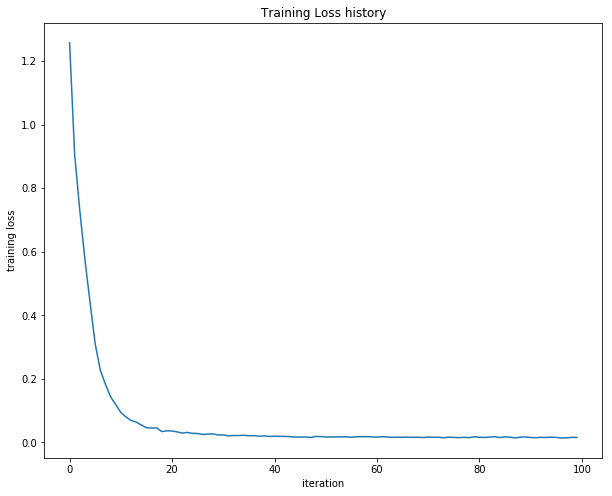

In [21]:
net = init_toy_model()
stats = net.train(X, y, X, y,
            learning_rate=1e-1, reg=5e-6,
            num_iters=100, verbose=False)

print('Final training loss: ', stats['loss_history'][-1])

# plot the loss history
plt.plot(stats['loss_history'])
plt.xlabel('iteration')
plt.ylabel('training loss')
plt.title('Training Loss history')
plt.show()

# Load the data
Now that you have implemented a two-layer network that passes gradient checks and works on toy data, it's time to load up our favorite CIFAR-10 data so we can use it to train a classifier on a real dataset.

In [22]:
from lib.data_utils import load_CIFAR10

def get_CIFAR10_data(num_training=49000, num_validation=1000, num_test=1000):
    """
    Load the CIFAR-10 dataset from disk and perform preprocessing to prepare
    it for the two-layer neural net classifier. These are the same steps as
    we used for the SVM, but condensed to a single function.  
    """
    # Load the raw CIFAR-10 data
    cifar10_dir = 'lib/datasets/cifar-10-batches-py'
    X_train, y_train, X_test, y_test = load_CIFAR10(cifar10_dir)
        
    # Subsample the data
    mask = list(range(num_training, num_training + num_validation))
    X_val = X_train[mask]
    y_val = y_train[mask]
    mask = list(range(num_training))
    X_train = X_train[mask]
    y_train = y_train[mask]
    mask = list(range(num_test))
    X_test = X_test[mask]
    y_test = y_test[mask]

    # Normalize the data: subtract the mean image
    mean_image = np.mean(X_train, axis=0)
    X_train -= mean_image
    X_val -= mean_image
    X_test -= mean_image

    # Reshape data to rows
    X_train = X_train.reshape(num_training, -1)
    X_val = X_val.reshape(num_validation, -1)
    X_test = X_test.reshape(num_test, -1)

    return X_train, y_train, X_val, y_val, X_test, y_test


# Invoke the above function to get our data.
X_train, y_train, X_val, y_val, X_test, y_test = get_CIFAR10_data()
print('Train data shape: ', X_train.shape)
print('Train labels shape: ', y_train.shape)
print('Validation data shape: ', X_val.shape)
print('Validation labels shape: ', y_val.shape)
print('Test data shape: ', X_test.shape)
print('Test labels shape: ', y_test.shape)

Train data shape:  (49000, 3072)
Train labels shape:  (49000,)
Validation data shape:  (1000, 3072)
Validation labels shape:  (1000,)
Test data shape:  (1000, 3072)
Test labels shape:  (1000,)


# Train a network
To train our network we will use SGD. In addition, we will adjust the learning rate with an exponential learning rate schedule as optimization proceeds; after each epoch, we will reduce the learning rate by multiplying it by a decay rate.

In [24]:
input_size = 32 * 32 * 3
hidden_size = 50
num_classes = 10
net = TwoLayerNet(input_size, hidden_size, num_classes)

# Train the network
stats = net.train(X_train, y_train, X_val, y_val,
            num_iters=1000, batch_size=200,
            learning_rate=1e-4, learning_rate_decay=0.95,
            reg=0.25, verbose=True)

# Predict on the validation set
val_acc = (net.predict(X_val) == y_val).mean()
print('Validation accuracy: ', val_acc)

iteration 0 / 1000: loss 2.302779, val_acc 0.088000
iteration 100 / 1000: loss 2.302408, val_acc 0.243000
iteration 200 / 1000: loss 2.299458, val_acc 0.203000
iteration 300 / 1000: loss 2.274808, val_acc 0.185000
iteration 400 / 1000: loss 2.163863, val_acc 0.205000
iteration 500 / 1000: loss 2.095472, val_acc 0.228000
iteration 600 / 1000: loss 2.132452, val_acc 0.245000
iteration 700 / 1000: loss 2.023618, val_acc 0.259000
iteration 800 / 1000: loss 2.045024, val_acc 0.258000
iteration 900 / 1000: loss 1.975342, val_acc 0.274000
Validation accuracy:  0.284


# Debug the training
With the default parameters we provided above, you should get a validation accuracy of about 0.29 on the validation set. This isn't very good.

One strategy for getting insight into what's wrong is to plot the loss function and the accuracies on the training and validation sets during optimization.

Another strategy is to visualize the weights that were learned in the first layer of the network. In most neural networks trained on visual data, the first layer weights typically show some visible structure when visualized.

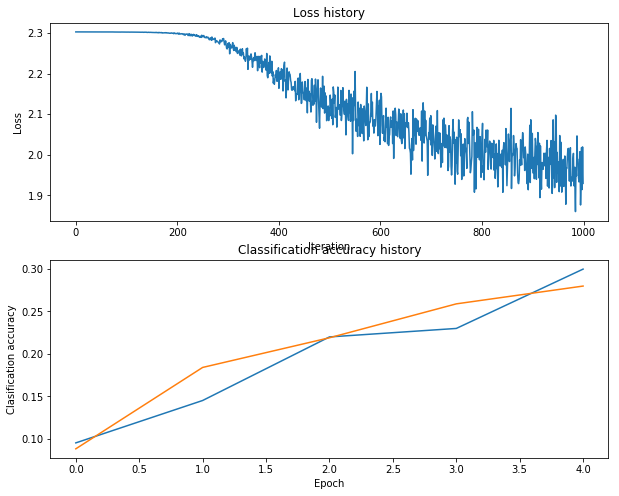

In [25]:
# Plot the loss function and train / validation accuracies
plt.subplot(2, 1, 1)
plt.plot(stats['loss_history'])
plt.title('Loss history')
plt.xlabel('Iteration')
plt.ylabel('Loss')

plt.subplot(2, 1, 2)
plt.plot(stats['train_acc_history'], label='train')
plt.plot(stats['val_acc_history'], label='val')
plt.title('Classification accuracy history')
plt.xlabel('Epoch')
plt.ylabel('Clasification accuracy')
plt.show()

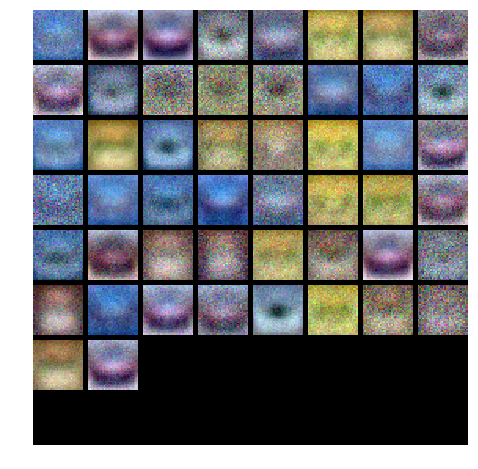

In [26]:
from lib.vis_utils import visualize_grid

# Visualize the weights of the network

def show_net_weights(net):
    W1 = net.params['W1']
    W1 = W1.reshape(32, 32, 3, -1).transpose(3, 0, 1, 2)
    plt.imshow(visualize_grid(W1, padding=3).astype('uint8'))
    plt.gca().axis('off')
    plt.show()

show_net_weights(net)

# Tune your hyperparameters

**What's wrong?** Looking at the visualizations above, we see that the loss is decreasing more or less linearly, which seems to suggest that the learning rate may be too low. Moreover, there is no gap between the training and validation accuracy, suggesting that the model we used has low capacity, and that we should increase its size. On the other hand, with a very large model we would expect to see more overfitting, which would manifest itself as a very large gap between the training and validation accuracy.

**Tuning**. Tuning the hyperparameters and developing intuition for how they affect the final performance is a large part of using Neural Networks, so we want you to get a lot of practice. Below, you should experiment with different values of the various hyperparameters, including hidden layer size, learning rate, numer of training epochs, and regularization strength. You might also consider tuning the learning rate decay, but you should be able to get good performance using the default value.

**Approximate results**. You should be aim to achieve a classification accuracy of greater than 48% on the validation set. Our best network gets over 52% on the validation set.

In [34]:
best_net = None # store the best model into this 

best_val = -1
results = {}

#################################################################################
# TODO: Tune hyperparameters using the validation set. The best trained model   #
# will be stored in best_net.                                                   #
#################################################################################
#hidden_sizes = []   # values to be tunned
hidden_sizes = [80, 160, 320]
#learning_rates = [] # values to be tunned
learning_rates = [1e-1, 1e-2, 1e-3, 1e-4]
#regs = []           # values to be tunned
regs = [1e-1, 1e-2, 1e-3, 1e-4]
#################################################################################
#                              END OF YOUR CODE                                 #
#################################################################################

# Tweaking hyperparameters by hand can be fun, but you might find it useful to 
# write code to sweep through possible combinations of hyperparameters          
# automatically like we did on the previous exercises.                          
#
grid_search=[(x,y,z) for x in hidden_sizes for y in learning_rates for z in regs]

for hidden_size,lr,reg in grid_search:
    
    net = TwoLayerNet(input_size, hidden_size, num_classes)

    # Train the network
    net.train(X_train, y_train, X_val, y_val,
                num_iters=3000, batch_size=200,
                learning_rate=lr, learning_rate_decay=0.95,
                reg=reg, verbose=True)

    # Predict on the validation set and compute accuracy
    val_accuracy = (net.predict(X_val) == y_val).mean()
    print('Validation accuracy: ', val_accuracy)
    
    results[(hidden_size,lr,reg)]=val_accuracy
    
    if val_accuracy > best_val:
        best_val=val_accuracy
        best_net=net

# Print out results.
for hidden_size, lr, reg in sorted(results):
    val_accuracy = results[(hidden_size, lr, reg)]
    print('hidden_size %d lr %e reg %e val accuracy: %f' % (
                hidden_size, lr, reg, val_accuracy))
    
print('best validation accuracy achieved during cross-validation: %f' % best_val)


iteration 0 / 3000: loss 2.302691, val_acc 0.125000
iteration 100 / 3000: loss nan, val_acc 0.087000
iteration 200 / 3000: loss nan, val_acc 0.087000
iteration 300 / 3000: loss nan, val_acc 0.087000
iteration 400 / 3000: loss nan, val_acc 0.087000
iteration 500 / 3000: loss nan, val_acc 0.087000
iteration 600 / 3000: loss nan, val_acc 0.087000
iteration 700 / 3000: loss nan, val_acc 0.087000
iteration 800 / 3000: loss nan, val_acc 0.087000
iteration 900 / 3000: loss nan, val_acc 0.087000
iteration 1000 / 3000: loss nan, val_acc 0.087000
iteration 1100 / 3000: loss nan, val_acc 0.087000
iteration 1200 / 3000: loss nan, val_acc 0.087000
iteration 1300 / 3000: loss nan, val_acc 0.087000
iteration 1400 / 3000: loss nan, val_acc 0.087000
iteration 1500 / 3000: loss nan, val_acc 0.087000
iteration 1600 / 3000: loss nan, val_acc 0.087000
iteration 1700 / 3000: loss nan, val_acc 0.087000
iteration 1800 / 3000: loss nan, val_acc 0.087000
iteration 1900 / 3000: loss nan, val_acc 0.087000
iterati

iteration 1200 / 3000: loss nan, val_acc 0.087000
iteration 1300 / 3000: loss nan, val_acc 0.087000
iteration 1400 / 3000: loss nan, val_acc 0.087000
iteration 1500 / 3000: loss nan, val_acc 0.087000
iteration 1600 / 3000: loss nan, val_acc 0.087000
iteration 1700 / 3000: loss nan, val_acc 0.087000
iteration 1800 / 3000: loss nan, val_acc 0.087000
iteration 1900 / 3000: loss nan, val_acc 0.087000
iteration 2000 / 3000: loss nan, val_acc 0.087000
iteration 2100 / 3000: loss nan, val_acc 0.087000
iteration 2200 / 3000: loss nan, val_acc 0.087000
iteration 2300 / 3000: loss nan, val_acc 0.087000
iteration 2400 / 3000: loss nan, val_acc 0.087000
iteration 2500 / 3000: loss nan, val_acc 0.087000
iteration 2600 / 3000: loss nan, val_acc 0.087000
iteration 2700 / 3000: loss nan, val_acc 0.087000
iteration 2800 / 3000: loss nan, val_acc 0.087000
iteration 2900 / 3000: loss nan, val_acc 0.087000
Validation accuracy:  0.087
iteration 0 / 3000: loss 2.302562, val_acc 0.164000
iteration 100 / 3000

iteration 1700 / 3000: loss 1.217466, val_acc 0.487000
iteration 1800 / 3000: loss 1.255127, val_acc 0.484000
iteration 1900 / 3000: loss 1.336189, val_acc 0.478000
iteration 2000 / 3000: loss 1.204854, val_acc 0.501000
iteration 2100 / 3000: loss 1.240493, val_acc 0.489000
iteration 2200 / 3000: loss 1.121680, val_acc 0.500000
iteration 2300 / 3000: loss 1.264663, val_acc 0.487000
iteration 2400 / 3000: loss 1.061825, val_acc 0.512000
iteration 2500 / 3000: loss 1.194358, val_acc 0.513000
iteration 2600 / 3000: loss 1.127376, val_acc 0.510000
iteration 2700 / 3000: loss 1.212082, val_acc 0.511000
iteration 2800 / 3000: loss 1.330466, val_acc 0.514000
iteration 2900 / 3000: loss 1.275619, val_acc 0.509000
Validation accuracy:  0.518
iteration 0 / 3000: loss 2.302600, val_acc 0.122000
iteration 100 / 3000: loss 1.941789, val_acc 0.298000
iteration 200 / 3000: loss 1.721863, val_acc 0.377000
iteration 300 / 3000: loss 1.759680, val_acc 0.408000
iteration 400 / 3000: loss 1.564909, val_ac

iteration 1500 / 3000: loss 1.811145, val_acc 0.344000
iteration 1600 / 3000: loss 1.791352, val_acc 0.351000
iteration 1700 / 3000: loss 1.903793, val_acc 0.355000
iteration 1800 / 3000: loss 1.891536, val_acc 0.358000
iteration 1900 / 3000: loss 1.756443, val_acc 0.365000
iteration 2000 / 3000: loss 1.756742, val_acc 0.370000
iteration 2100 / 3000: loss 1.830233, val_acc 0.365000
iteration 2200 / 3000: loss 1.839169, val_acc 0.374000
iteration 2300 / 3000: loss 1.673042, val_acc 0.382000
iteration 2400 / 3000: loss 1.694240, val_acc 0.386000
iteration 2500 / 3000: loss 1.773774, val_acc 0.382000
iteration 2600 / 3000: loss 1.796397, val_acc 0.381000
iteration 2700 / 3000: loss 1.750332, val_acc 0.387000
iteration 2800 / 3000: loss 1.715212, val_acc 0.392000
iteration 2900 / 3000: loss 1.742459, val_acc 0.400000
Validation accuracy:  0.393
iteration 0 / 3000: loss 2.302840, val_acc 0.100000
iteration 100 / 3000: loss nan, val_acc 0.087000
iteration 200 / 3000: loss nan, val_acc 0.0870

iteration 2600 / 3000: loss nan, val_acc 0.087000
iteration 2700 / 3000: loss nan, val_acc 0.087000
iteration 2800 / 3000: loss nan, val_acc 0.087000
iteration 2900 / 3000: loss nan, val_acc 0.087000
Validation accuracy:  0.087
iteration 0 / 3000: loss 2.302571, val_acc 0.223000
iteration 100 / 3000: loss nan, val_acc 0.087000
iteration 200 / 3000: loss nan, val_acc 0.087000
iteration 300 / 3000: loss nan, val_acc 0.087000
iteration 400 / 3000: loss nan, val_acc 0.087000
iteration 500 / 3000: loss nan, val_acc 0.087000
iteration 600 / 3000: loss nan, val_acc 0.087000
iteration 700 / 3000: loss nan, val_acc 0.087000
iteration 800 / 3000: loss nan, val_acc 0.087000
iteration 900 / 3000: loss nan, val_acc 0.087000
iteration 1000 / 3000: loss nan, val_acc 0.087000
iteration 1100 / 3000: loss nan, val_acc 0.087000
iteration 1200 / 3000: loss nan, val_acc 0.087000
iteration 1300 / 3000: loss nan, val_acc 0.087000
iteration 1400 / 3000: loss nan, val_acc 0.087000
iteration 1500 / 3000: loss n

iteration 200 / 3000: loss 1.730847, val_acc 0.373000
iteration 300 / 3000: loss 1.689631, val_acc 0.426000
iteration 400 / 3000: loss 1.499804, val_acc 0.431000
iteration 500 / 3000: loss 1.666666, val_acc 0.452000
iteration 600 / 3000: loss 1.520734, val_acc 0.454000
iteration 700 / 3000: loss 1.344418, val_acc 0.472000
iteration 800 / 3000: loss 1.268577, val_acc 0.490000
iteration 900 / 3000: loss 1.368076, val_acc 0.493000
iteration 1000 / 3000: loss 1.420464, val_acc 0.499000
iteration 1100 / 3000: loss 1.356711, val_acc 0.493000
iteration 1200 / 3000: loss 1.239508, val_acc 0.503000
iteration 1300 / 3000: loss 1.284352, val_acc 0.484000
iteration 1400 / 3000: loss 1.419689, val_acc 0.500000
iteration 1500 / 3000: loss 1.297655, val_acc 0.497000
iteration 1600 / 3000: loss 1.255495, val_acc 0.496000
iteration 1700 / 3000: loss 1.308388, val_acc 0.499000
iteration 1800 / 3000: loss 1.379154, val_acc 0.508000
iteration 1900 / 3000: loss 1.322893, val_acc 0.499000
iteration 2000 / 3

Validation accuracy:  0.399
iteration 0 / 3000: loss 2.302584, val_acc 0.104000
iteration 100 / 3000: loss 2.300400, val_acc 0.218000
iteration 200 / 3000: loss 2.286718, val_acc 0.200000
iteration 300 / 3000: loss 2.221637, val_acc 0.203000
iteration 400 / 3000: loss 2.144545, val_acc 0.223000
iteration 500 / 3000: loss 2.114257, val_acc 0.248000
iteration 600 / 3000: loss 2.077439, val_acc 0.251000
iteration 700 / 3000: loss 1.930942, val_acc 0.270000
iteration 800 / 3000: loss 1.918030, val_acc 0.284000
iteration 900 / 3000: loss 1.953665, val_acc 0.294000
iteration 1000 / 3000: loss 1.954393, val_acc 0.309000
iteration 1100 / 3000: loss 1.922034, val_acc 0.310000
iteration 1200 / 3000: loss 1.840046, val_acc 0.328000
iteration 1300 / 3000: loss 1.835687, val_acc 0.335000
iteration 1400 / 3000: loss 1.798703, val_acc 0.343000
iteration 1500 / 3000: loss 1.876821, val_acc 0.343000
iteration 1600 / 3000: loss 1.903014, val_acc 0.355000
iteration 1700 / 3000: loss 1.764774, val_acc 0.3

iteration 900 / 3000: loss nan, val_acc 0.087000
iteration 1000 / 3000: loss nan, val_acc 0.087000
iteration 1100 / 3000: loss nan, val_acc 0.087000
iteration 1200 / 3000: loss nan, val_acc 0.087000
iteration 1300 / 3000: loss nan, val_acc 0.087000
iteration 1400 / 3000: loss nan, val_acc 0.087000
iteration 1500 / 3000: loss nan, val_acc 0.087000
iteration 1600 / 3000: loss nan, val_acc 0.087000
iteration 1700 / 3000: loss nan, val_acc 0.087000
iteration 1800 / 3000: loss nan, val_acc 0.087000
iteration 1900 / 3000: loss nan, val_acc 0.087000
iteration 2000 / 3000: loss nan, val_acc 0.087000
iteration 2100 / 3000: loss nan, val_acc 0.087000
iteration 2200 / 3000: loss nan, val_acc 0.087000
iteration 2300 / 3000: loss nan, val_acc 0.087000
iteration 2400 / 3000: loss nan, val_acc 0.087000
iteration 2500 / 3000: loss nan, val_acc 0.087000
iteration 2600 / 3000: loss nan, val_acc 0.087000
iteration 2700 / 3000: loss nan, val_acc 0.087000
iteration 2800 / 3000: loss nan, val_acc 0.087000
i

iteration 1700 / 3000: loss 1.338441, val_acc 0.482000
iteration 1800 / 3000: loss 1.248175, val_acc 0.519000
iteration 1900 / 3000: loss 1.212298, val_acc 0.514000
iteration 2000 / 3000: loss 1.126843, val_acc 0.524000
iteration 2100 / 3000: loss 1.134545, val_acc 0.509000
iteration 2200 / 3000: loss 1.087206, val_acc 0.501000
iteration 2300 / 3000: loss 1.344897, val_acc 0.530000
iteration 2400 / 3000: loss 1.157508, val_acc 0.521000
iteration 2500 / 3000: loss 1.215483, val_acc 0.537000
iteration 2600 / 3000: loss 1.152013, val_acc 0.537000
iteration 2700 / 3000: loss 1.111941, val_acc 0.515000
iteration 2800 / 3000: loss 1.029455, val_acc 0.524000
iteration 2900 / 3000: loss 1.048297, val_acc 0.514000
Validation accuracy:  0.525
iteration 0 / 3000: loss 2.302573, val_acc 0.143000
iteration 100 / 3000: loss 1.781603, val_acc 0.310000
iteration 200 / 3000: loss 1.650498, val_acc 0.389000
iteration 300 / 3000: loss 1.650031, val_acc 0.411000
iteration 400 / 3000: loss 1.576423, val_ac

iteration 1500 / 3000: loss 1.911952, val_acc 0.351000
iteration 1600 / 3000: loss 1.712647, val_acc 0.363000
iteration 1700 / 3000: loss 1.833924, val_acc 0.366000
iteration 1800 / 3000: loss 1.795297, val_acc 0.371000
iteration 1900 / 3000: loss 1.790444, val_acc 0.375000
iteration 2000 / 3000: loss 1.852071, val_acc 0.376000
iteration 2100 / 3000: loss 1.734797, val_acc 0.387000
iteration 2200 / 3000: loss 1.694736, val_acc 0.385000
iteration 2300 / 3000: loss 1.648412, val_acc 0.377000
iteration 2400 / 3000: loss 1.717547, val_acc 0.387000
iteration 2500 / 3000: loss 1.643789, val_acc 0.384000
iteration 2600 / 3000: loss 1.756790, val_acc 0.390000
iteration 2700 / 3000: loss 1.704838, val_acc 0.396000
iteration 2800 / 3000: loss 1.582644, val_acc 0.398000
iteration 2900 / 3000: loss 1.780021, val_acc 0.408000
Validation accuracy:  0.405
iteration 0 / 3000: loss 2.302638, val_acc 0.084000
iteration 100 / 3000: loss 2.299933, val_acc 0.242000
iteration 200 / 3000: loss 2.276986, val_

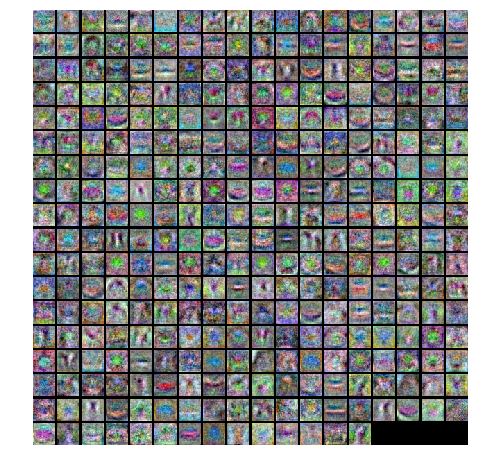

In [31]:
# visualize the weights of the best network
show_net_weights(best_net)

# Run on the test set
When you are done experimenting, you should evaluate your final trained network on the test set; you should get above 48%.

In [32]:
test_acc = (best_net.predict(X_test) == y_test).mean()
print('Test accuracy: ', test_acc)

Test accuracy:  0.534
